In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
data = pd.read_csv("dataset/winequality-red.csv")

In [4]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
classes = data['quality'].unique()
np.sort(classes)
classes

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
x_transform = StandardScaler().fit_transform(x)


In [45]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size=0.2,random_state=40)

In [46]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
clf.score(x_test,y_test)

0.63125

In [48]:
feature_names = list(x.columns)
class_labels = list(y.unique())
class_labels

[5, 6, 7, 4, 8, 3]

### Visualize Decision Tree

In [49]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [50]:
dot_data = export_graphviz(clf,feature_names=feature_names,rounded=True,filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("Tree.png")

Image(graph.create_png())

### PCA

In [51]:
# scale data
from sklearn.preprocessing import StandardScaler
x_transform = StandardScaler().fit_transform(x)

Text(0, 0.5, 'Variance %')

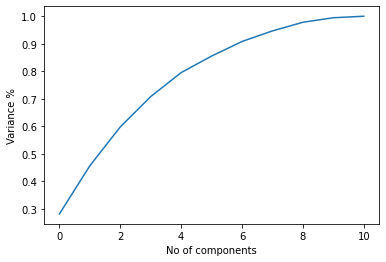

In [52]:
from sklearn.decomposition import PCA
principalComps = PCA().fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components")
plt.ylabel("Variance %")

It shows that 8 features can explain upto 95% of the variance in the dataset

In [53]:
## pick best 8 columns
new_data = PCA(n_components=8).fit_transform(x_transform)
x_pca = pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
x_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   
1 -0.799170  1.856553 -0.911690  0.548066 -0.018392  0.929714 -1.009829   
2 -0.748479  0.882039 -1.171394  0.411021 -0.043531  0.401473 -0.539553   
3  2.357673 -0.269976  0.243489 -0.928450 -1.499149 -0.131017  0.344290   
4 -1.619530  0.450950 -1.774454  0.043740  0.067014 -0.913921 -0.161043   

        PC8  
0 -0.282258  
1  0.762587  
2  0.597946  
3 -0.455375  
4 -0.282258

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=40)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.64375

### Hyper Parameter Tuning : GridSearchCV Algorithm
#### Computationally Very Expensive

In [54]:
# hyper paramater tuning for 3 hyperparameters
grid_param = {
    'criterion' : ['gini', 'entrophy'],
    'max_depth' : range(2,32,3),
    'min_samples_leaf' : range(1,10,3),
    'min_samples_split' : range(2,10,3),
    'splitter' : ['best','random']
}

In [56]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                           param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)